In [1]:
import numpy as np
import gym
import time
from matplotlib import pyplot as plt

In [2]:
epsilon = 0.9
min_epsilon = 0.01
decay_rate = 0.9
total_episodes = 30000
step_limit = 100
learning_rate = 0.05
gamma = 0.95

In [3]:
env = gym.make("FrozenLake-v0")
Q = np.zeros((env.observation_space.n, env.action_space.n))
steps_total = []
rewards_total = []
egreedy_total = []

def pick_action(observation):
    action = 0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[observation, :])
    return action

def learn(obs_old, obs_new, reward, action,gamma=0.95,learning_rate=0.1):
    prediction = Q[obs_old, action]
    target = reward + gamma * np.max(Q[obs_new, :])
    Q[obs_old, action] = Q[obs_old, action] + learning_rate * (target - prediction)

def movingaverage(values, window):    
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [4]:
for episode in range(total_episodes):
    obs = env.reset()
    t = 0
    if episode % step_limit == 99:
        epsilon *= decay_rate
        epsilon = max(epsilon, min_epsilon)
    while t < step_limit:
        action = pick_action(obs)
        obs2, reward, done, info = env.step(action)
        learn(obs, obs2, reward, action, gamma,learning_rate)
        obs = obs2
        t += 1
        if done:            
            rewards_total.append(reward)
            egreedy_total.append(epsilon)
            steps_total.append(t)
            if reward > 0.0:
                outcome = "WIN"                
            else:
                outcome = "LOSE"
            print(f"Episode {episode} | {t} steps | {outcome}")
            break

61 | 23 steps | WIN
Episode 29362 | 25 steps | WIN
Episode 29363 | 91 steps | WIN
Episode 29364 | 41 steps | LOSE
Episode 29365 | 22 steps | WIN
Episode 29366 | 14 steps | WIN
Episode 29367 | 16 steps | WIN
Episode 29368 | 61 steps | LOSE
Episode 29369 | 32 steps | LOSE
Episode 29370 | 61 steps | WIN
Episode 29371 | 20 steps | WIN
Episode 29372 | 24 steps | LOSE
Episode 29373 | 15 steps | WIN
Episode 29374 | 28 steps | WIN
Episode 29375 | 89 steps | WIN
Episode 29376 | 49 steps | LOSE
Episode 29377 | 63 steps | WIN
Episode 29378 | 19 steps | WIN
Episode 29379 | 17 steps | LOSE
Episode 29380 | 37 steps | WIN
Episode 29381 | 66 steps | LOSE
Episode 29382 | 73 steps | LOSE
Episode 29383 | 25 steps | WIN
Episode 29384 | 39 steps | LOSE
Episode 29385 | 48 steps | LOSE
Episode 29386 | 96 steps | LOSE
Episode 29387 | 31 steps | WIN
Episode 29388 | 16 steps | LOSE
Episode 29389 | 24 steps | WIN
Episode 29390 | 8 steps | WIN
Episode 29391 | 67 steps | WIN
Episode 29392 | 91 steps | WIN
Episode 

In [5]:
Q

array([[0.18102108, 0.16400245, 0.16339418, 0.16455235],
       [0.09661393, 0.07973772, 0.09597669, 0.15303926],
       [0.1548698 , 0.11341366, 0.10029422, 0.09186909],
       [0.05996367, 0.00103361, 0.00207231, 0.00657883],
       [0.21523507, 0.15491566, 0.14754943, 0.10733414],
       [0.        , 0.        , 0.        , 0.        ],
       [0.08960849, 0.08800203, 0.20301516, 0.03862955],
       [0.        , 0.        , 0.        , 0.        ],
       [0.1259403 , 0.19942817, 0.17231034, 0.26965906],
       [0.2575831 , 0.38539571, 0.25841153, 0.28088507],
       [0.36098491, 0.30453209, 0.28939091, 0.18596412],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.28737502, 0.35948059, 0.5511942 , 0.31380855],
       [0.52163642, 0.75241597, 0.5994621 , 0.64213086],
       [0.        , 0.        , 0.        , 0.        ]])

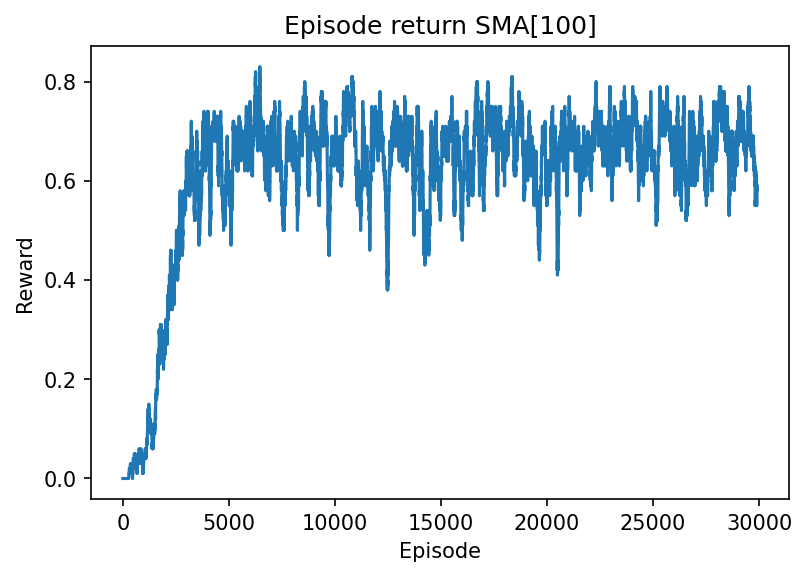

In [6]:
window = 100
average_reward = movingaverage(rewards_total, window)

plt.figure(dpi=150)
plt.title(f"Episode return SMA[{window}]")
plt.ylabel("Reward")
plt.xlabel("Episode")
plt.plot(average_reward)
plt.savefig("episode_return.jpg")

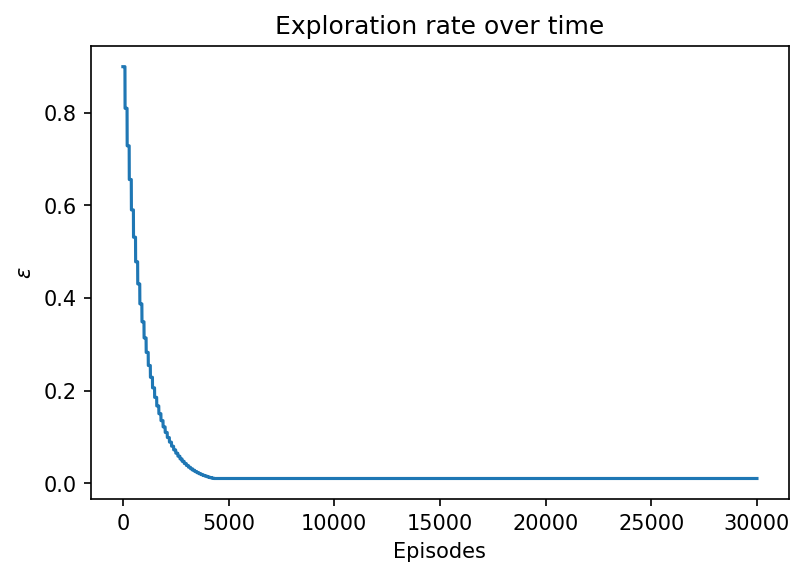

In [7]:
plt.figure(dpi=150)
plt.title(f"Exploration rate over time")
plt.ylabel("$\epsilon$")
plt.xlabel("Episodes")
plt.plot(egreedy_total)